# Week6 Use Case Case MNIST Fashion

In [1]:
#Import General Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import livelossplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1 Load the built-in MNIST dataset from the keras.datasets library
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
#Create dictionary of class values and class descriptions
class_labels ={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',
               5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

Ankle boot


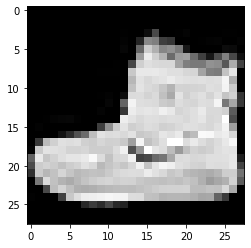

In [4]:
plt.imshow(x_train[0], cmap='gray')
print(class_labels[y_train[0]])

In [5]:
#Create a copy so as to view images after reshaping
x_tr = x_train
x_te = x_test

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#Reshape data to be dimension 4 as CNN expects dimension of, so add a dimension of 1

x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255
x_train.shape

(60000, 28, 28, 1)

### Build the model structure

In [8]:
#Build the model structure

# Initiaize the model
from keras import Sequential
model = Sequential()

In [9]:
# Add First 2D Convolution layer with 28 outputs and a 3x3 convolution window
from keras.layers import Conv2D
model.add(Conv2D(28, (3,3), input_shape = (28, 28, 1),  activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Add a hidden max pooling layer with pool size of 2x2
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
# Add a flattening layer as the seconf hidden layer
from keras.layers import Flatten
model.add(Flatten())

In [12]:
# Add a third hidden layer that is fully connected with 128 units and relu for activation
from keras.layers import Dense
model.add(Dense(units = 128, activation = 'relu'))

In [13]:
# Add the output layer - a fully connected layer with 10 output layers 
#(0 - 9 for handwritten digits) and softmax as the activator
model.add(Dense(units = 10, activation = 'softmax'))

In [14]:
# complile the model with loss as  "sparse categorical crossentropy",
#"accuracy" for metrics and "adam" to optimize
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
# Add liveloss plot as a callbacks to monitor progress when fitting below
live_plot = livelossplot.PlotLossesKeras()

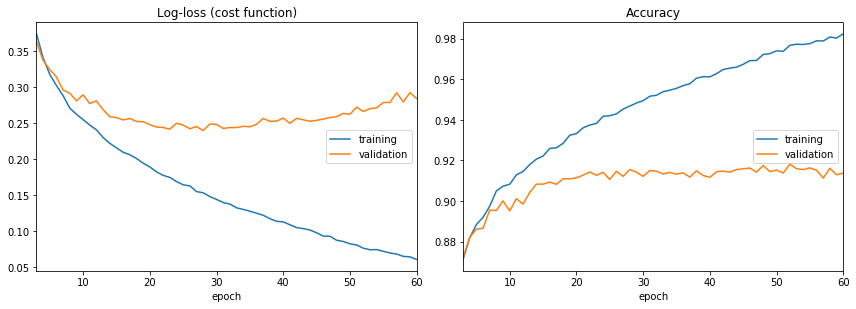

Log-loss (cost function):
training   (min:    0.061, max:    0.849, cur:    0.061)
validation (min:    0.240, max:    0.493, cur:    0.284)

Accuracy:
training   (min:    0.728, max:    0.982, cur:    0.982)
validation (min:    0.824, max:    0.918, cur:    0.914)


In [16]:
# Fit the model & train for 60 epochs initially, livelossplot in callbacks, validation split 
# and higher batch size to improve speed
model.fit(x_train, y_train, validation_split=0.2, 
          callbacks = [live_plot], epochs = 60, batch_size = 1000)

In [17]:
# Test the CNN after 60 epochs
loss, accuracy = model.evaluate(x_test, y_test)
print('loss is:  ', loss, '  ; accuracy is: ',accuracy)

10000/10000 [==============================] - 2s 211us/step
loss is:   0.30552595142424105   ; accuracy is:  0.9119


In [18]:
# Put results value in y_pred
y_pred = model.predict(x_test).argmax(axis=1)

In [19]:
# Compare results in table of predictions from index 16 to 30
dash='='*55
print(dash,'\n','{:<10}{:<22}{:<18}'.format('x_test','prediction','actual'))
print(dash)
j = 16 #offset from 0 to wanted begining index for sample
for i in range(15):
    y_p = class_labels[y_pred[i+j]]
    y_a = class_labels[y_test[i+j]]
    print(' {:<10}{:<20}{:<20}{:<18}'.format(i+j,y_p,y_a,str(y_p == y_a)))

 x_test    prediction            actual            
 16        Pullover            Pullover            True              
 17        Coat                Coat                True              
 18        Bag                 Bag                 True              
 19        T-shirt/top         T-shirt/top         True              
 20        Pullover            Pullover            True              
 21        Sandal              Sandal              True              
 22        Sneaker             Sneaker             True              
 23        Sandal              Ankle boot          False             
 24        Trouser             Trouser             True              
 25        Coat                Coat                True              
 26        Shirt               Shirt               True              
 27        T-shirt/top         T-shirt/top         True              
 28        Ankle boot          Ankle boot          True              
 29        Dress               Dress  

x_test image and prediction


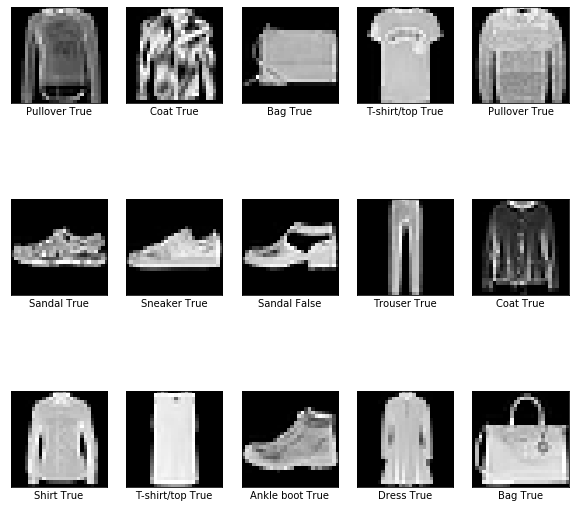

In [20]:
# Compare results in a display of 15 images from index 16 to 30
print('x_test image and prediction')
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_te[i+j], cmap='gray')
    plt.xlabel(class_labels[y_pred[i+j]]+' '+str(y_pred[i+j]==y_test[i+j]))
plt.show()

### Look at improving model by reducing overfitting. 
###  Explore larger batch and dropout, keep best weights

In [21]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [22]:
model2 = Sequential()
model2.add(Conv2D(28, (3,3), input_shape = (28, 28, 1),  activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Flatten())
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dropout(0.375))
model2.add(Dense(units = 10, activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


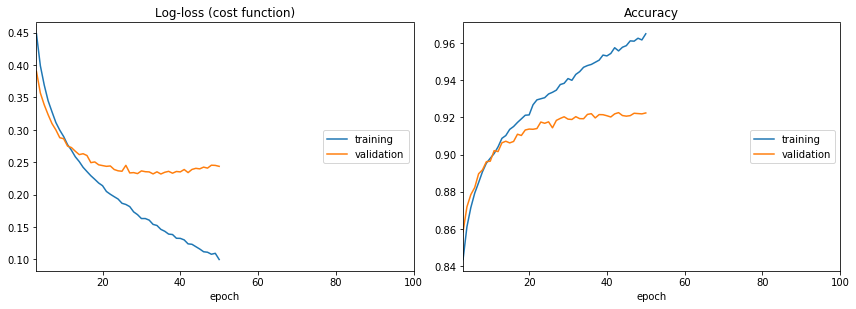

Log-loss (cost function):
training   (min:    0.100, max:    1.042, cur:    0.100)
validation (min:    0.232, max:    0.551, cur:    0.244)

Accuracy:
training   (min:    0.654, max:    0.965, cur:    0.965)
validation (min:    0.801, max:    0.923, cur:    0.922)


In [23]:
live_plot = livelossplot.PlotLossesKeras()

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=15, 
                           verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model2.fit(x_train, y_train, validation_split = 0.3, 
           callbacks = [live_plot, early_stop], epochs = 100, batch_size = 1200)

In [24]:
loss, accuracy = model2.evaluate(x_test, y_test)
print('loss is:  ', loss, '  ; accuracy is: ',accuracy)

10000/10000 [==============================] - 2s 207us/step
loss is:   0.2512508708834648   ; accuracy is:  0.9119


### Some improvement in loss, but no improvement in accuracy

In [25]:
# Put results value in y_pred
y_pred2 = model2.predict(x_test).argmax(axis=1)

In [27]:
# Compare results in table of predictions from index 31 to 45
dash='='*55
print(dash,'\n','{:<10}{:<22}{:<18}'.format('x_test','prediction','actual'))
print(dash)
j = 31     #offset from 0 to wanted begining index for sample
for i in range(15):
    y_p = class_labels[y_pred2[i+j]]
    y_a = class_labels[y_test[i+j]]
    print(' {:<10}{:<20}{:<20}{:<18}'.format(i+j,y_p,y_a,str(y_p == y_a)))

 x_test    prediction            actual            
 31        Bag                 Bag                 True              
 32        Dress               Dress               True              
 33        Dress               Dress               True              
 34        Bag                 Bag                 True              
 35        T-shirt/top         T-shirt/top         True              
 36        Sneaker             Sneaker             True              
 37        Sandal              Sandal              True              
 38        Sneaker             Sneaker             True              
 39        Ankle boot          Ankle boot          True              
 40        T-shirt/top         Shirt               False             
 41        Trouser             Trouser             True              
 42        Shirt               Dress               False             
 43        Sneaker             Sneaker             True              
 44        Shirt               Shirt  

x_test image and prediction


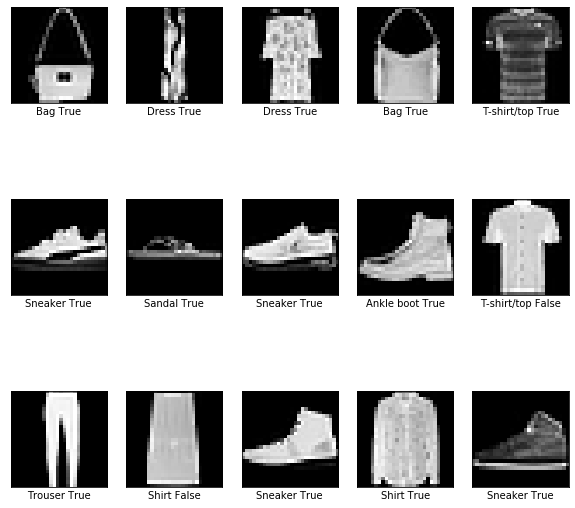

In [28]:
# Compare results in a display of 15 images from index 16 to 30
print('x_test image and prediction')
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_te[i+j], cmap='gray')
    plt.xlabel(class_labels[y_pred[i+j]]+' '+str(y_pred[i+j]==y_test[i+j]))
plt.show()